# 0. Set Up Dependencies for Preprocessing Images and Building Model

In [ ]:
!pip install matplotlib seaborn keras sklearn pandas

In [ ]:
!pip install grpcio==1.44.0

In [ ]:
!pip install tensorflow 

In [ ]:
!pip install scikit-learn scipy matplotlib

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

In [336]:
MODEL_NAME = 'asl_model_28x28_validation_40epochs' # used for importing pretrained models

TRAIN_FILEPATH = 'images/sign_mnist_train/'
TEST_FILEPATH = 'images/sign_mnist_test/'

# 1. Preprocess Image Data for CNN

(28, 28, 1)


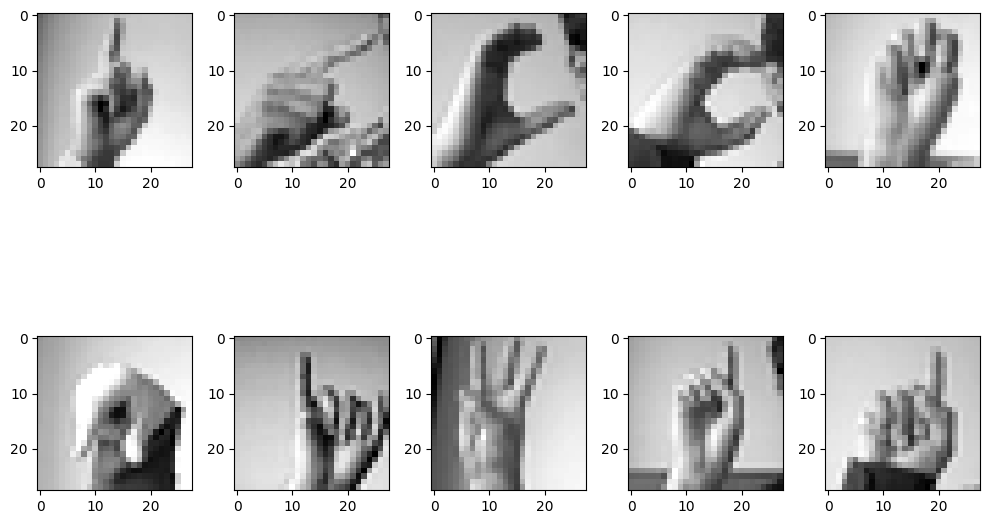

In [294]:
# Sign Language MNIST: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
train_df = pd.read_csv(TRAIN_FILEPATH + "sign_mnist_train.csv")
test_df = pd.read_csv(TEST_FILEPATH + "sign_mnist_test.csv")

y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

# Convert input to binary and reshape it (increases speed of training time)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

# Normalize pixels to be between 0-1, helps save computation time 
x_train = x_train / 255
x_test = x_test / 255

# Reshape images 
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(x_train[0].shape)

# Preview train data
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 
 
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

# 2. Build Model

In [48]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

# Adding dropout and normalization will help prevent overfitting 
# BatchNormalization() enables higher learning rates, thus increases speed of training time
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

# 3. Compile, Train, and Save Model

In [49]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

#history = model.fit(datagen.flow(x_train,y_train, batch_size = 128), epochs = 20, validation_data = (x_test, y_test))
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

model.save('models/asl_model_28x28_custom_LROnPlateau')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_15 (Bat  (None, 28, 28, 75)       300       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 75)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 50)        33800     
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_16 (Bat  (None, 14, 14, 50)      

2023-03-29 12:09:30.340904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


215/215 [==============================] - 62s 276ms/step - loss: 1.0581 - accuracy: 0.6672 - val_loss: 4.4200 - val_accuracy: 0.0899 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 60s 280ms/step - loss: 0.2174 - accuracy: 0.9280 - val_loss: 1.8608 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 60s 277ms/step - loss: 0.1027 - accuracy: 0.9676 - val_loss: 0.0582 - val_accuracy: 0.9859 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 62s 290ms/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0376 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 61s 282ms/step - loss: 0.0515 - accuracy: 0.9832 - val_loss: 0.0675 - val_accuracy: 0.9770 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 60s 281ms/step - loss: 0.0376 - accuracy: 0.9885 - val_loss: 0.0206 - val_accuracy: 0.9939 - lr: 0.0010
Epoch 7/20
215/215 [==============================] - 66s 305ms

2023-03-29 12:31:59.730249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,14,14,50]
	 [[{{node inputs}}]]
2023-03-29 12:31:59.771849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-03-29 12:32:00.315319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,14,14,50]
	 [[{{node inputs}}]]
2023-0

INFO:tensorflow:Assets written to: models/asl_model_28x28_custom_LROnPlateau/assets


INFO:tensorflow:Assets written to: models/asl_model_28x28_custom_LROnPlateau/assets


In [ ]:
# Import model
from keras import models
model = models.load_model('models/' + MODEL_NAME)

In [50]:
# Evaluate model (uses df.test for evaluation)
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

# Testing with data from https://www.kaggle.com/datasets/grassknoted/asl-alphabet


225/225 [==============================] - 4s 19ms/step - loss: 5.8661e-04 - accuracy: 1.0000
Accuracy of the model is -  100.0 %


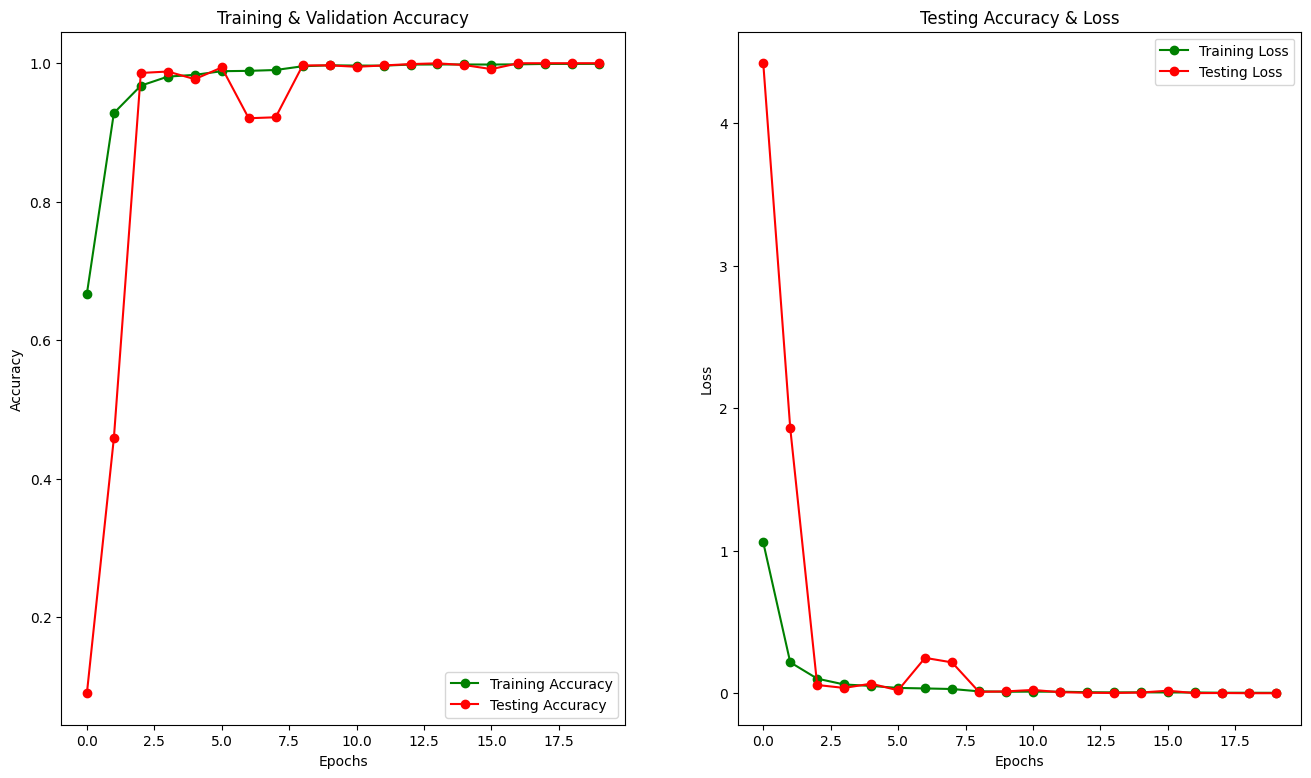

In [51]:
# Analysis of Model After Training
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [307]:
# --- Testing Correctly predicts from test.csv !!! ---
predictions = model.predict(x_test)
print(x_test[0].shape)
word_dict = labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'K', 10:'L', 11:'M', 12:'N', 13:'O', 14:'P', 15:'Q', 16:'R', 17:'S', 18:'T', 19:'U', 20:'V', 21:'W', 22:'X', 23:'Y'}
print("predictions on test data:")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

225/225 [==============================] - 5s 24ms/step
(7172, 28, 28, 1)
predictions on test data:

G   F   K   A   D   V   K   O   D   H   I   I   V   M   H   E   W   A   H   H   C   A   V   E   K   P   C   P   H   B   H   I   N   T   D   V   N   D   S   O   P   X   I   P   O   F   R   E   T   N   U   W   U   F   Q   Q   V   E   H   W   K   N   L   W   C   K   B   E   S   E   U   G   P   E   D   U   P   L   C   C   R   C   H   V   X   H   M   R   Y   O   C   B   H   X   I   F   A   A   T   V   I   E   C   U   Q   B   P   O   C   G   M   F   A   Y   C   T   O   Y   Q   K   E   I   I   M   M   I   G   V   E   P   L   V   C   P   X   X   E   V   W   D   P   S   H   R   V   G   B   G   K   F   E   V   D   V   O   X   C   K   H   F   O   V   I   E   S   X   N   D   G   I   N   P   E   Q   D   R   S   G   V   B   N   Q   Y   X   C   H   I   Y   B   M   X   D   A   P   N   P   N   F   L   B   H   H   I   B   X   A   I   T   U   O   D   H   O   M   S   G   D   P   E   K   E   P   F   G   K  

# 4. Test Model with Image

In [52]:
!pip install utils

  Using cached utils-1.0.1-py2.py3-none-any.whl (21 kB)


In [ ]:
# --- Testing Images from Train/Test Datasets to Ensure Model Reading Input Correctly --- #
import numpy as np
import pandas as pd
import cv2
import utils
import os

In [295]:
# Converting image from train.csv row 0.
data = pd.read_csv(TRAIN_FILEPATH + 'sign_mnist_train.csv')
row = data.iloc[2]
pixels = [str(p) + "" for p in row]
pixels.pop(0)

img = np.array(pixels)
img = img.reshape(28,28)  # dimensions of the image
image = np.zeros((28,28,3))  # empty matrix
image[:,:,0] = img
image[:,:,1] = img
image[:,:,2] = img

pic = image.astype(np.uint8)

In [83]:
# --- Testing Images from Custom Input --- #
# Note: I took images of myself, cropped it, then resized to 28x28 using some website. This shouldn't matter tho
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image

1/1 [==============================] - 0s 120ms/step
Q   

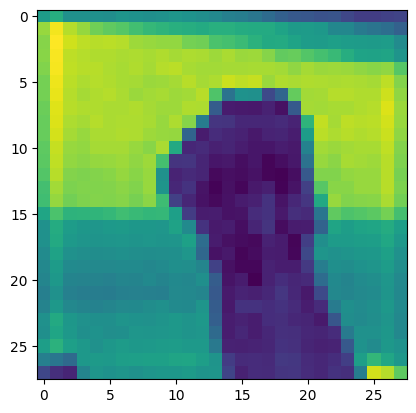

In [361]:
model = models.load_model('models/' + MODEL_NAME)
IMAGE_NAME = 'M_test.jpg'

#img_path = 'images/test_images/' + IMAGE_NAME 
img_path = 'images/test_images/diff_dataset_asl_alphabet_test/' + IMAGE_NAME
img = cv2.imread(img_path) 

# Format image for model input (it likes (28, 28, 1))
img = img[:,:,0]
img = cv2.resize(img, (28, 28))
img = img / 255
pic = img.reshape(-1,28, 28, 1)

# Testing if model can predict models from a given image
predictions = model.predict(pic)
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
plt.imshow(img)

# 5. (WIP) Test Model with Real-Time Image Capture

In [ ]:
!pip install torch

In [12]:
import torch
import joblib
import torch.nn as nn
import numpy as np
import argparse
import torch.nn.functional as F
import time
from keras import models
from PIL import Image
import numpy as np
import cv2
import pandas as pd

In [ ]:
#word_dict = labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'K', 10:'L', 11:'M', 12:'N', 13:'O', 14:'P', 15:'Q', 16:'R', 17:'S', 18:'T', 19:'U', 20:'V', 21:'W', 22:'X', 23:'Y'}
etterpred = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

background = None
accumulated_weight = 0.5
ROI_top = 100
ROI_bottom = 300
ROI_right = 150
ROI_left = 350

def cal_accum_avg(frame, accumulated_weight):
    global background
    
    if background is None:
        background = frame.copy().astype("float")
        return None
    cv2.accumulateWeighted(frame, background, accumulated_weight)
    
# Returns the hand segment(max contour) and the thresholded image of hand
def segment_hand(frame, threshold=25):
    global background

    diff = cv2.absdiff(background.astype("uint8"), frame)


    _ , thresholded = cv2.threshold(diff, threshold, 255,
    cv2.THRESH_BINARY)

    # Fetching contours in the frame (These contours can be of hand or any other object in foreground) …
    #image, contours, hierarchy = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours, hierarchy = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If length of contours list = 0, means we didn't get any contours...
    if len(contours) == 0:
        return None
    else:
        # The largest external contour should be the hand 
        hand_segment_max_cont = max(contours, key=cv2.contourArea)

        # Returning the hand segment(max contour) and the thresholded image of hand...
        return (thresholded, hand_segment_max_cont)

In [ ]:
# Load our model --- This cell runs but does not have correct label
model = models.load_model('models/asl_model_28x28')
cam = cv2.VideoCapture(0)
num_frames =0

if (cam.isOpened() == False):
    print('Error while trying to open camera. Plese check again...')

# read until end of video
while(cam.isOpened()):
    ret, frame = cam.read()
    
    # flipping the frame to prevent inverted image of captured frame...
    #frame = cv2.flip(frame, 1)
    frame_copy = frame.copy()
    
    # ROI from the frame
    roi = frame[ROI_top:ROI_bottom, ROI_right:ROI_left]
    gray_frame = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.GaussianBlur(gray_frame, (9, 9), 0)
    
    if num_frames < 70:
        
        cal_accum_avg(gray_frame, accumulated_weight)
        
        cv2.putText(frame_copy, "FETCHING BACKGROUND...PLEASE WAIT", (80, 400), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    
    else: 
        # segmenting the hand region
        hand = segment_hand(gray_frame)
        
        # Checking if we are able to detect the hand...
        if hand is not None:
            
            thresholded, hand_segment = hand
            # Drawing contours around hand segment
            cv2.drawContours(frame_copy, [hand_segment + (ROI_right, ROI_top)], -1, (255, 0, 0),1)
            
            cv2.imshow("Thesholded Hand Image", thresholded)
            
            thresholded = cv2.resize(thresholded, (28, 28))
            thresholded = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB)
            thresholded = np.reshape(thresholded, (-1,thresholded.shape[0],thresholded.shape[1],1))
            
            #########            
            analysisframe = frame
            analysisframe = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2GRAY)
            analysisframe = cv2.resize(analysisframe,(28,28))
            nlist = []
            rows,cols = analysisframe.shape
            for i in range(rows):
                for j in range(cols):
                    k = analysisframe[i,j]
                    nlist.append(k)

            datan = pd.DataFrame(nlist).T
            colname = []
            for val in range(784):
                colname.append(val)
            datan.columns = colname

            pixeldata = datan.values
            pixeldata = pixeldata / 255
            pixeldata = pixeldata.reshape(-1,28,28,1)

            prediction = model.predict(pixeldata)
            predarray = np.array(prediction[0])
            letter_prediction_dict = {letterpred[i]: predarray[i] for i in range(len(letterpred))}            
            predarrayordered = sorted(predarray, reverse=True)
            print(letter_prediction_dict)
            high1 = predarrayordered[0]
            high2 = predarrayordered[1]
            high3 = predarrayordered[2]
            for key,value in letter_prediction_dict.items():
                if value==high1:
                    cv2.putText(frame_copy, "Predicted Character 1: " + key, (10, 40), cv2.FONT_ITALIC, 0.5, (250,128,114), 2)
                    print("Predicted Character 1: ", key)
                    print('Confidence 1: ', 100*value)
                elif value==high2:
                    cv2.putText(frame_copy, "Predicted Character 2: " + key, (10, 60), cv2.FONT_ITALIC, 0.5, (250,128,114), 2)
                    print("Predicted Character 2: ", key)
                    print('Confidence 2: ', 100*value)
                elif value==high3:
                    cv2.putText(frame_copy, "Predicted Character 3: " + key, (10, 80), cv2.FONT_ITALIC, 0.5, (250,128,114), 2)
                    print("Predicted Character 3: ", key)
                    print('Confidence 3: ', 100*value)
            time.sleep(5)
            #########
            
            
            #pred = model.predict(thresholded).argmax()
            #print(f"prediction: {pred}")
            #cv2.putText(frame_copy, word_dict[pred], (170, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            
    # Draw ROI on frame_copy
    cv2.rectangle(frame_copy, (ROI_left, ROI_top), (ROI_right, ROI_bottom), (255,128,0), 3)
    # incrementing the number of frames for tracking
    num_frames += 1
    # Display the frame with segmented hand
    cv2.putText(frame_copy, "ASL hand sign recognition...", (10, 20), cv2.FONT_ITALIC, 0.5, (51,255,51), 1)
    cv2.imshow("Sign Detection", frame_copy)
    # Close windows with Esc
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
# Release the camera and destroy all the windows
cam.release()
cv2.destroyAllWindows()

# Notes About the Project
This [video](https://www.youtube.com/watch?v=yqkISICHH-U&t=3083s) by Nicholas Renotte inspired me to build a project using object detection and a pretained model from the [Tensorflow Detection Model Zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md). After spending a ton of time trying to use the pretrained (on the famous COCO dataset) SSD MobileNet v2 320x320, its 640x640 variation, and even the SSD ResNet50 V1 FPN 640x640 (RetinaNet50). I was unsuccessful with these models. Each model failed to detect anything when more than 5 classes were added. No boundary boxes were even being drawn at first and then after retraining, too many boxes were drawn. 

I spent some time researching the pretrained Tensorflow SSD Mobilenet and noticed that a lot of people tried using them for the same project and were dealing with the same issues as me. I spent a few more days trying to fine tune the hyperparameters when I trained it on my own data. Still nothing. I refused to give up and started to research if using an LSTM would be the way to go. I tried installing the common Python package mediapipe and it would work (I couldn't use conda because I had run out of storage on my tiny 128gb MacBook). 

I decided to build a CNN with Keras. It's a 5 layer model (when only counting convolutional and dense layers), with batch normalization and dropout. These will help prevent overfitting, and increase the speed of training time. The training data was also binariazed, thus increasing the model's training time (this allowed it to converge faster). The shape of the model's input is (28, 28, 1).  

# References 
1. [Deep Learning for Sign Language Recognition: Current Techniques, Benchmarks, and Open Issues](https://ieeexplore.ieee.org/document/9530569) by Al-Qurishi et al.
2. [Sign Language Recognition System using TensorFlow Object Detection API](https://arxiv.org/abs/2201.01486) by Srivastava et al.
3. I used the [Sign-Language MNIST](https://www.kaggle.com/datasets/datamunge/sign-language-mnist) dataset from Kaggle.
4. This [Kaggle post](https://www.kaggle.com/code/madz2000/cnn-using-keras-100-accuracy/notebook) helped me get started on the ASL CNN detection project. I used the image preproessing steps, evaluation techniques and CNN model architecture.
5. Not super relevant to the entire project, but it helped me resolve an issue that I spent too many hours on and want to give credit. [link](https://stackoverflow.com/questions/59942348/cannot-reshape-array-of-size-2352-into-shape-1-28-28-1)
6. ___I plan on using some of the computer vision and hand segmentation information from [here](https://data-flair.training/blogs/sign-language-recognition-python-ml-opencv/) for real-time image capturing via a webcam.___